#Seaborn
Seaborn is a Python data visualization library based on matplotlib. It builds on matplotlib's foundation while providing an interface that integrates well with pandas DataFrames, making it ideal for data exploration and analysis.

Seaborn helps to explore and understand your data through visual representations, with an emphasis on making complex visualizations accessible and aesthetically pleasing.

In [ ]:
# Importing Seaborn and Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Basic Plotting with Seaborn
Seaborn simplifies creating informative and attractive visualizations. Let's start with some basic plots:

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


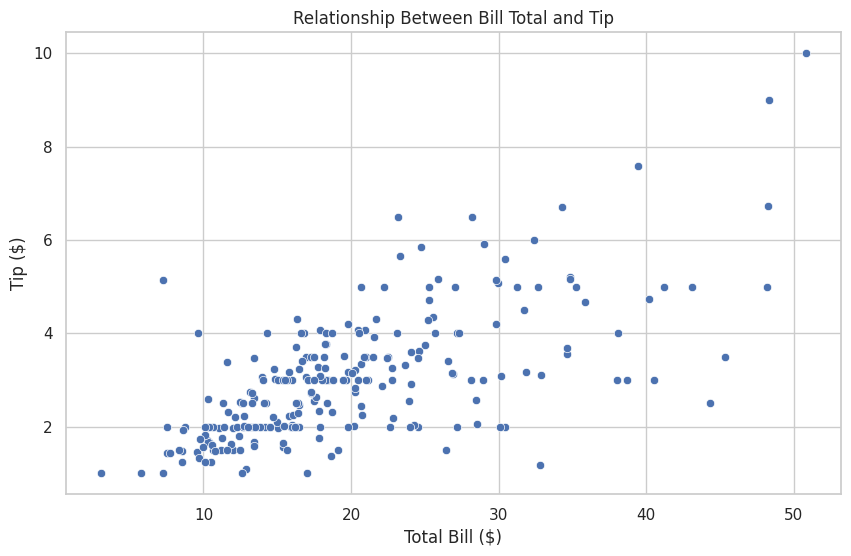

In [ ]:
# Load a built-in dataset
tips = sns.load_dataset("tips")

# Display the first few rows of the dataset
print(tips.head())

# Create a simple scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("Relationship Between Bill Total and Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

# Statistical Visualizations
Seaborn excels at statistical visualizations that help understand the distribution of data:

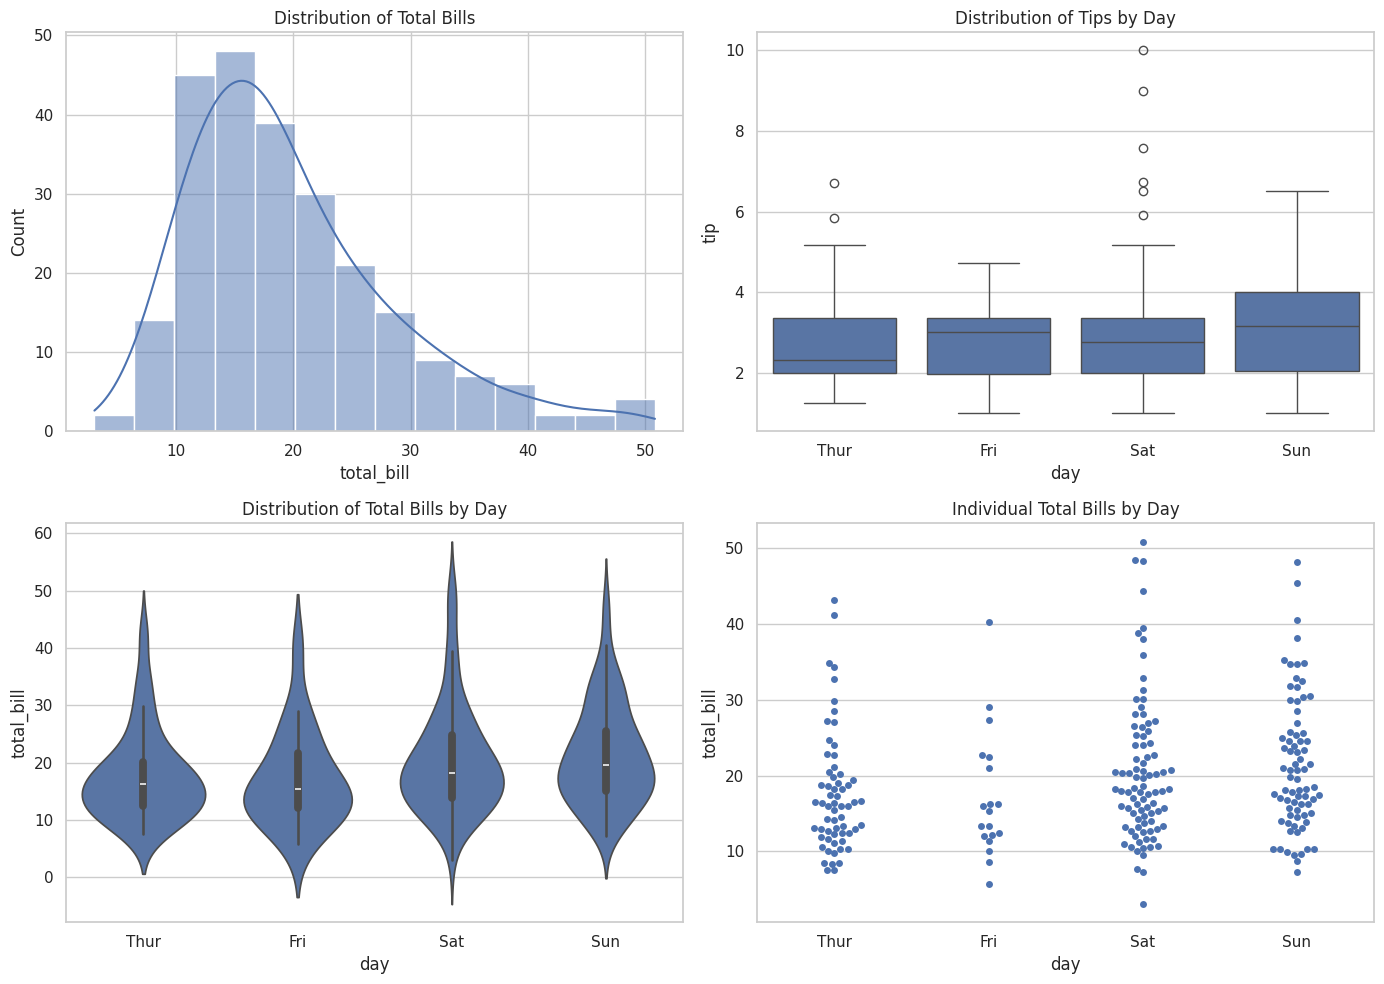

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot distributions of total bill
sns.histplot(data=tips, x="total_bill", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Total Bills")

# Plot box plot of tips by day
sns.boxplot(x="day", y="tip", data=tips, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Tips by Day")

# Plot violin plot of total bill by day
sns.violinplot(x="day", y="total_bill", data=tips, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Total Bills by Day")

# Plot swarm plot of total bill by day
sns.swarmplot(x="day", y="total_bill", data=tips, ax=axes[1, 1])
axes[1, 1].set_title("Individual Total Bills by Day")

plt.tight_layout()
plt.show()

# Categorical Plots
Seaborn offers specialized plots for categorical data analysis:

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


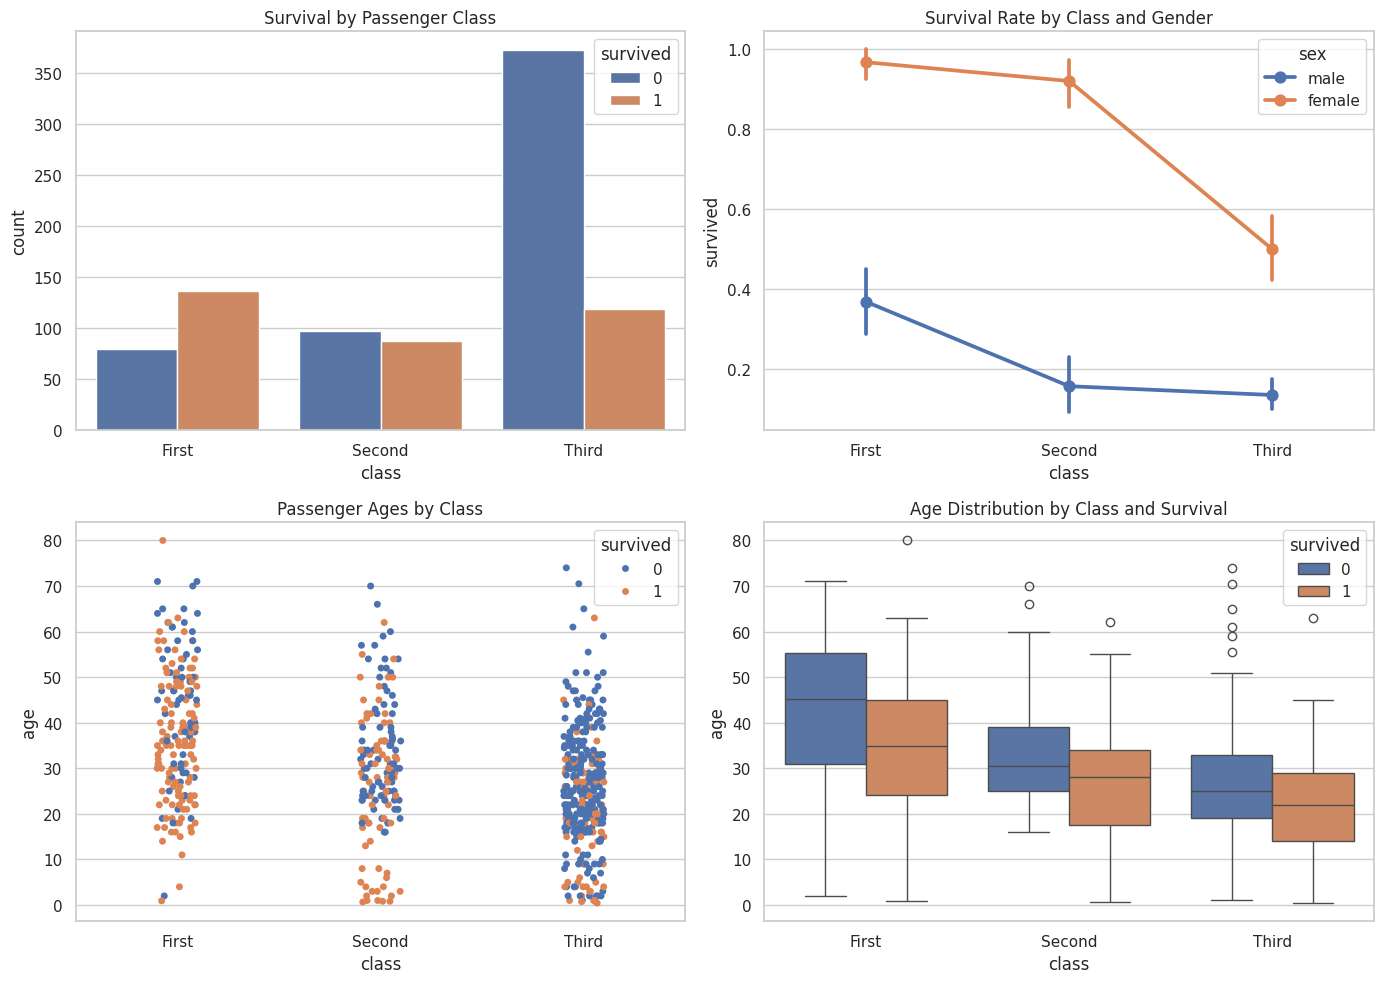

In [ ]:
# Load a different dataset
titanic = sns.load_dataset("titanic")
print(titanic.head())

# Create a figure for categorical plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar plot of survival by class
sns.countplot(x="class", hue="survived", data=titanic, ax=axes[0, 0])
axes[0, 0].set_title("Survival by Passenger Class")

# Point plot
sns.pointplot(x="class", y="survived", hue="sex", data=titanic, ax=axes[0, 1])
axes[0, 1].set_title("Survival Rate by Class and Gender")

# Strip plot
sns.stripplot(x="class", y="age", hue="survived", data=titanic, jitter=True, ax=axes[1, 0])
axes[1, 0].set_title("Passenger Ages by Class")

# Box plot
sns.boxplot(x="class", y="age", hue="survived", data=titanic, ax=axes[1, 1])
axes[1, 1].set_title("Age Distribution by Class and Survival")

plt.tight_layout()
plt.show()

# Regression Plots
Seaborn makes it easy to visualize relationships with regression lines:

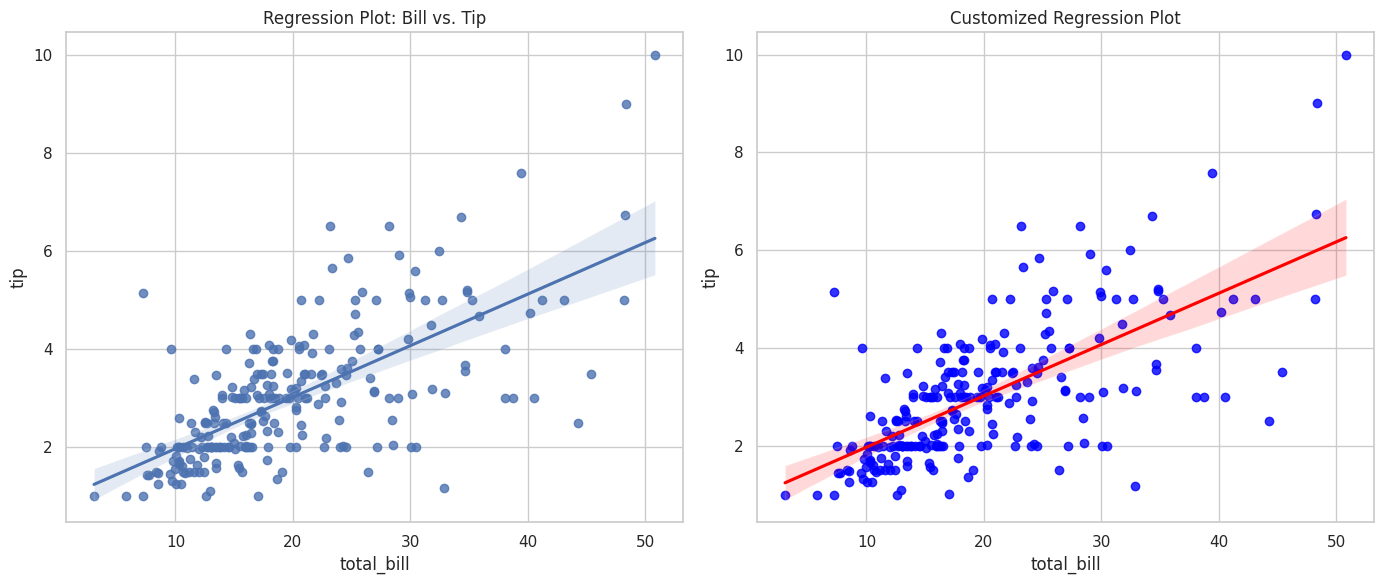

In [ ]:
# Create a figure for regression plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Basic regression plot
sns.regplot(x="total_bill", y="tip", data=tips, ax=axes[0])
axes[0].set_title("Regression Plot: Bill vs. Tip")

# Regression plot with additional parameters
sns.regplot(x="total_bill", y="tip", data=tips, scatter_kws={"color": "blue"},
           line_kws={"color": "red"}, ax=axes[1])
axes[1].set_title("Customized Regression Plot")

plt.tight_layout()
plt.show()

# Distribution Plots
Seaborn's distribution plots help you understand your data's distribution:

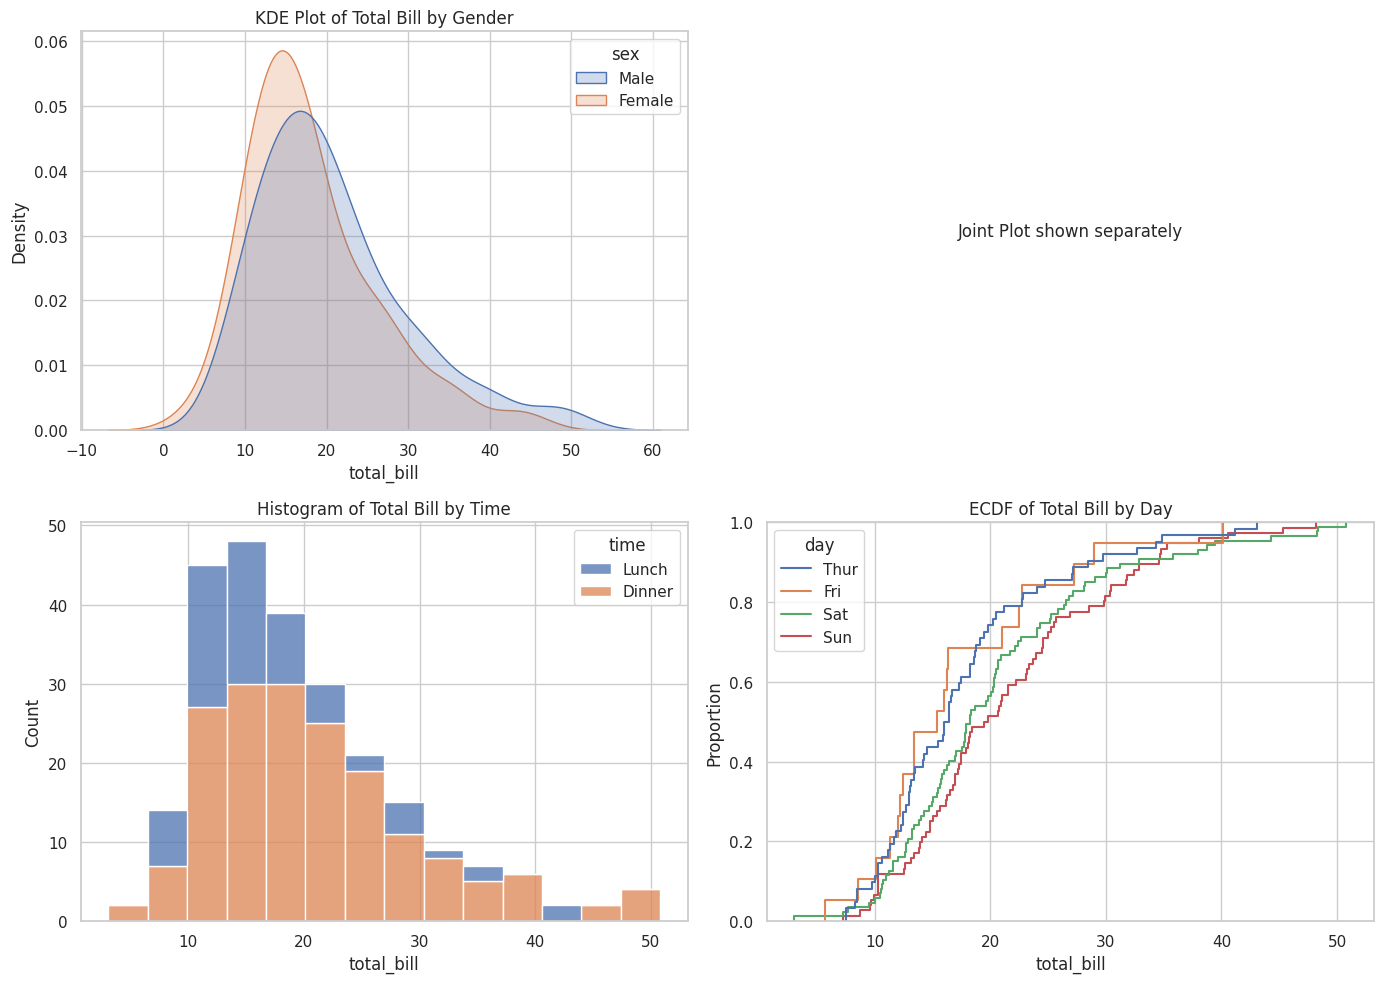

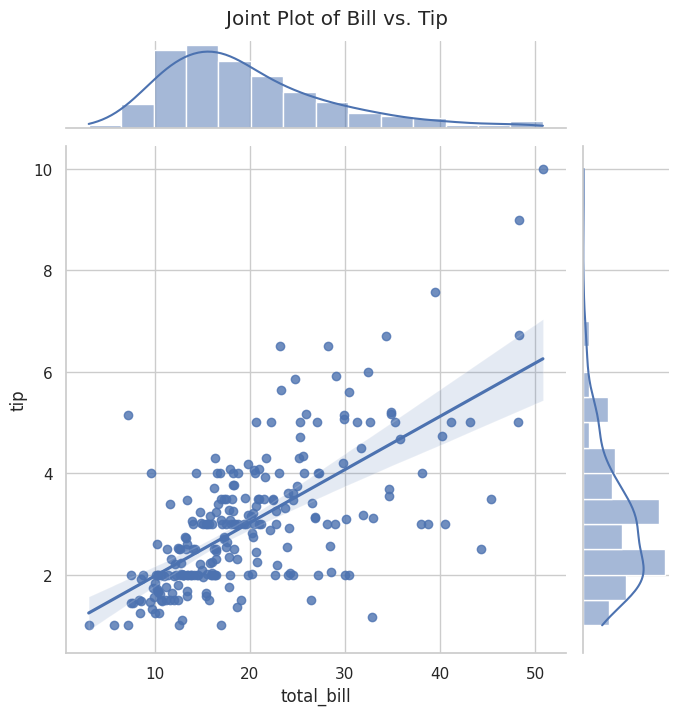

In [ ]:
# Create distribution plots
plt.figure(figsize=(14, 10))

# KDE plot
plt.subplot(2, 2, 1)
sns.kdeplot(data=tips, x="total_bill", hue="sex", fill=True, common_norm=False)
plt.title("KDE Plot of Total Bill by Gender")

# Joint plot (requires separate figure)
plt.subplot(2, 2, 2)
# We'll create a placeholder and show the joint plot separately
plt.text(0.5, 0.5, "Joint Plot shown separately", ha='center', va='center')
plt.axis('off')

# Histogram
plt.subplot(2, 2, 3)
sns.histplot(data=tips, x="total_bill", hue="time", multiple="stack")
plt.title("Histogram of Total Bill by Time")

# ECDF plot
plt.subplot(2, 2, 4)
sns.ecdfplot(data=tips, x="total_bill", hue="day")
plt.title("ECDF of Total Bill by Day")

plt.tight_layout()
plt.show()

# Joint plot (separate figure)
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg", height=7)
plt.suptitle("Joint Plot of Bill vs. Tip", y=1.02)
plt.show()

# Heatmaps and Matrix Plots
Seaborn's matrix plots are powerful for visualizing complex relationships:

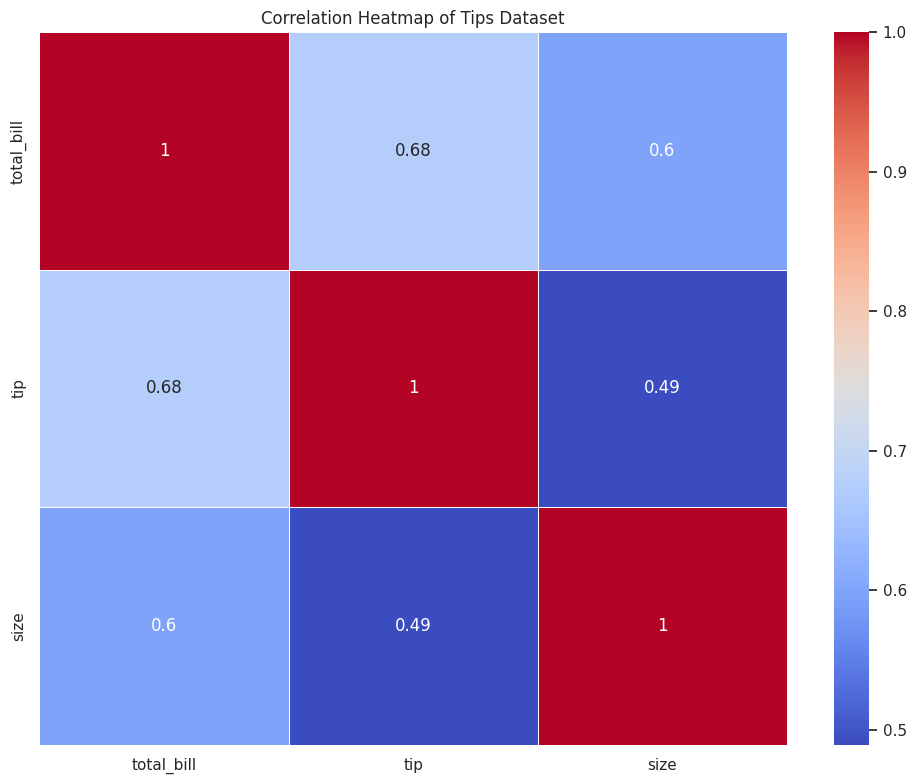

<ipython-input-11-42efbabb0ee2>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips_pivot = tips.pivot_table(values="tip", index="day", columns="time")


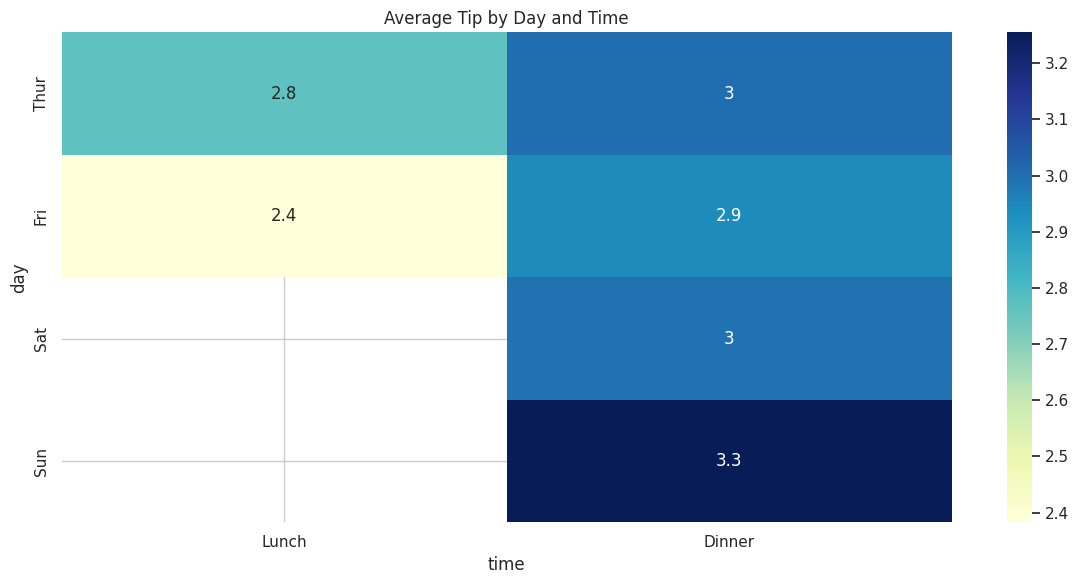

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr = tips.select_dtypes(include=np.number).corr()
# Generate heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Tips Dataset")
plt.tight_layout()
plt.show()

# Create a pivot table and plot as a heatmap
plt.figure(figsize=(12, 6))
tips_pivot = tips.pivot_table(values="tip", index="day", columns="time")
sns.heatmap(tips_pivot, annot=True, cmap="YlGnBu")
plt.title("Average Tip by Day and Time")
plt.tight_layout()
plt.show()

# Pair Plots and Facet Grids
Seaborn offers tools for creating multiple plots that show relationships between variables:

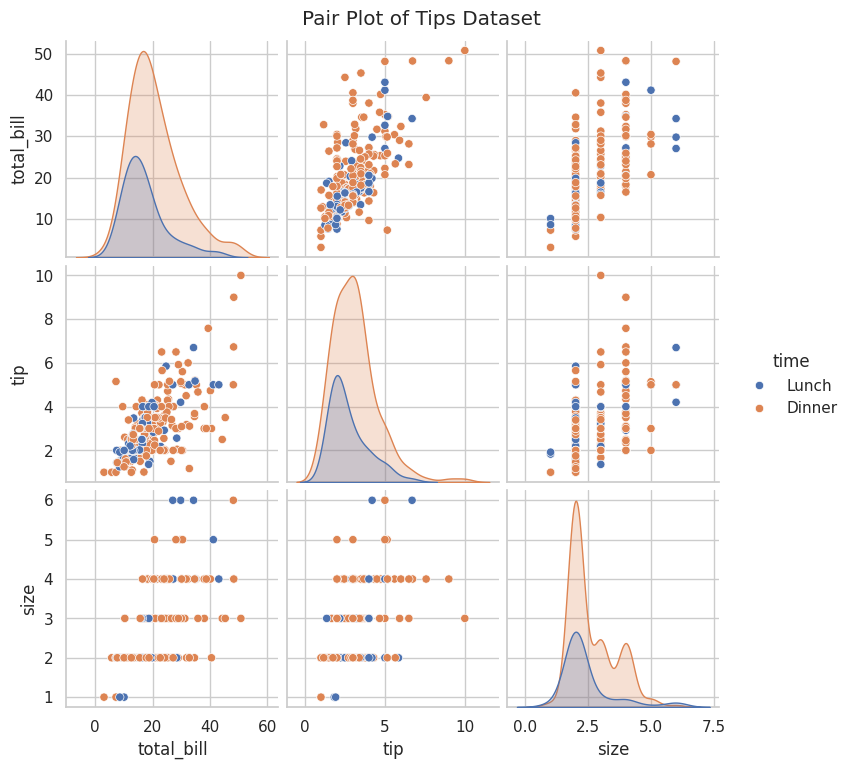

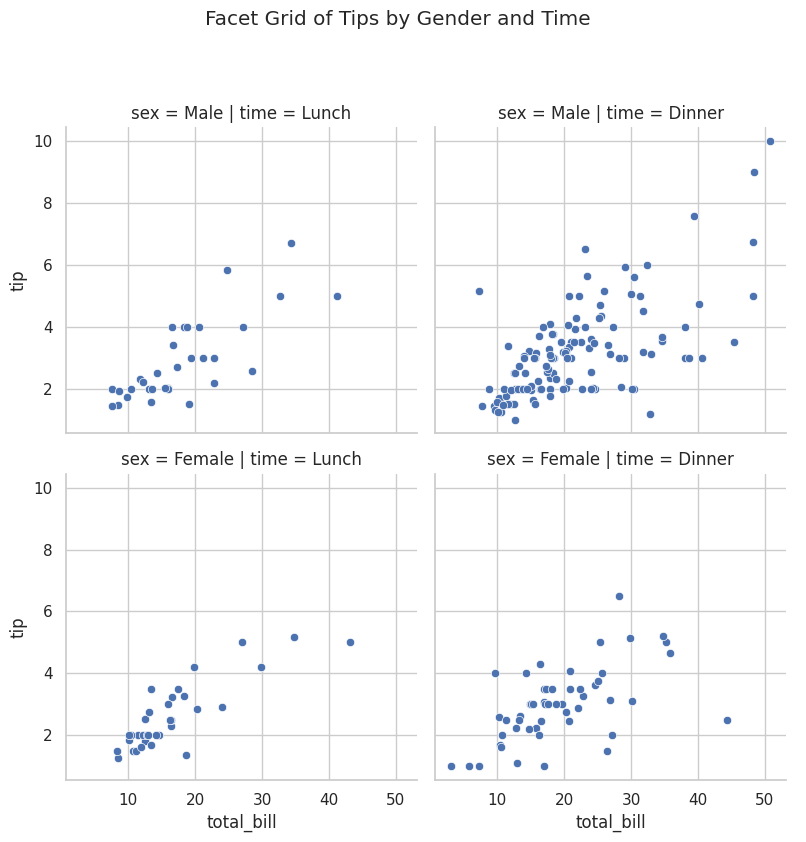

In [ ]:
# Create a pairplot
sns.pairplot(tips, hue="time", height=2.5)
plt.suptitle("Pair Plot of Tips Dataset", y=1.02)
plt.show()

# Create a facet grid
g = sns.FacetGrid(tips, col="time", row="sex", height=4)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()
plt.suptitle("Facet Grid of Tips by Gender and Time", y=1.05)
plt.tight_layout()
plt.show()

# Customizing Plots with Themes and Palettes
Seaborn provides various themes and color palettes for styling your visualizations:

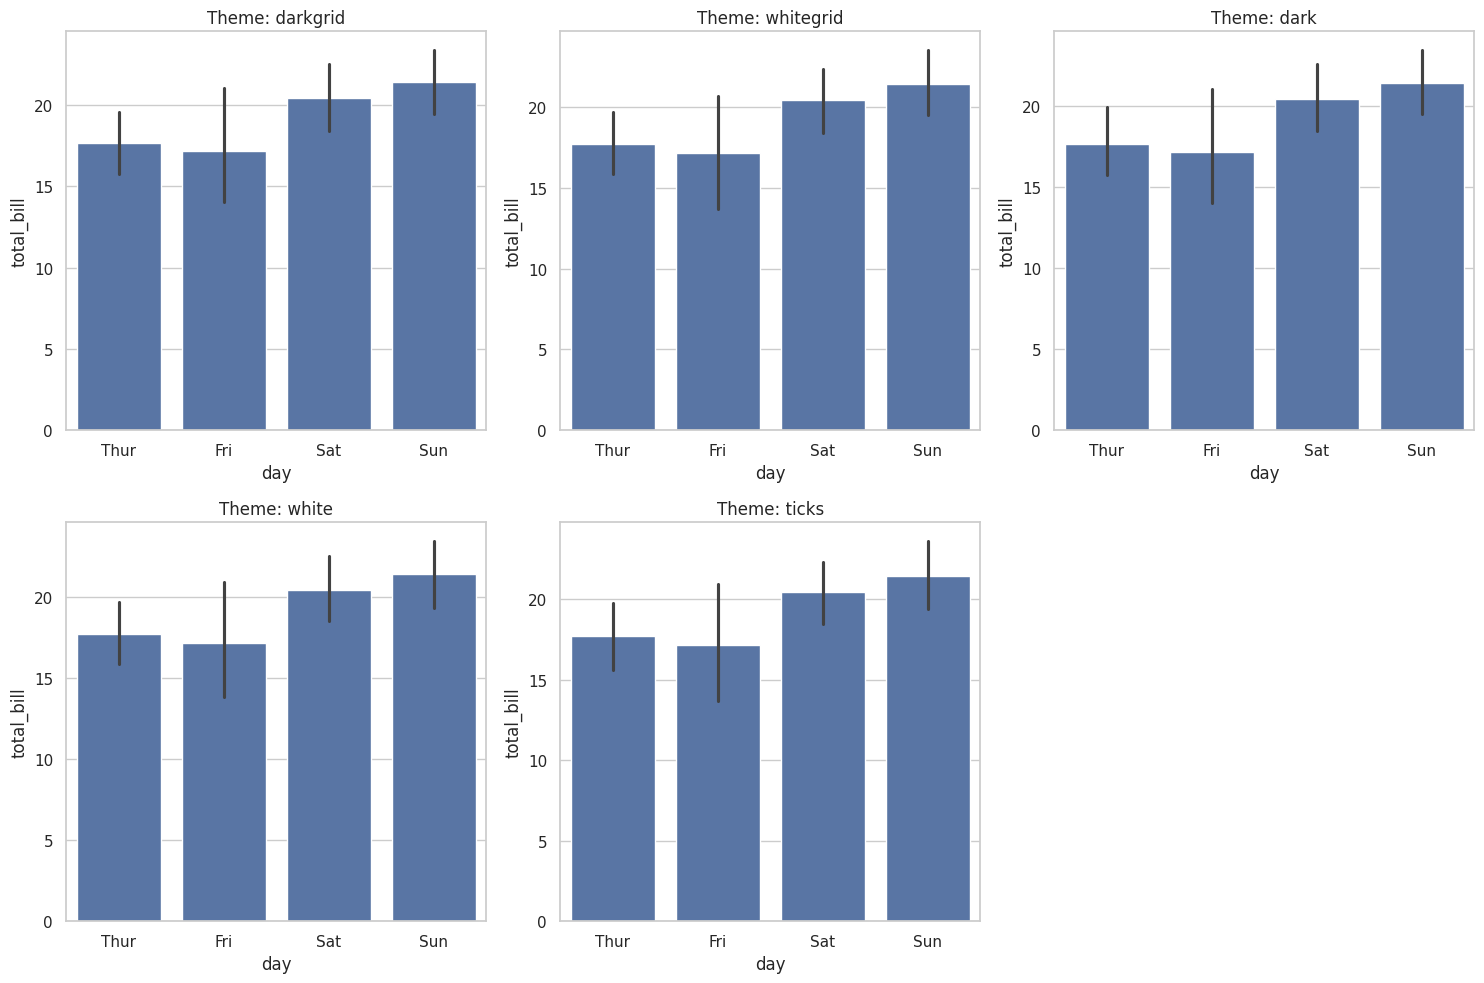

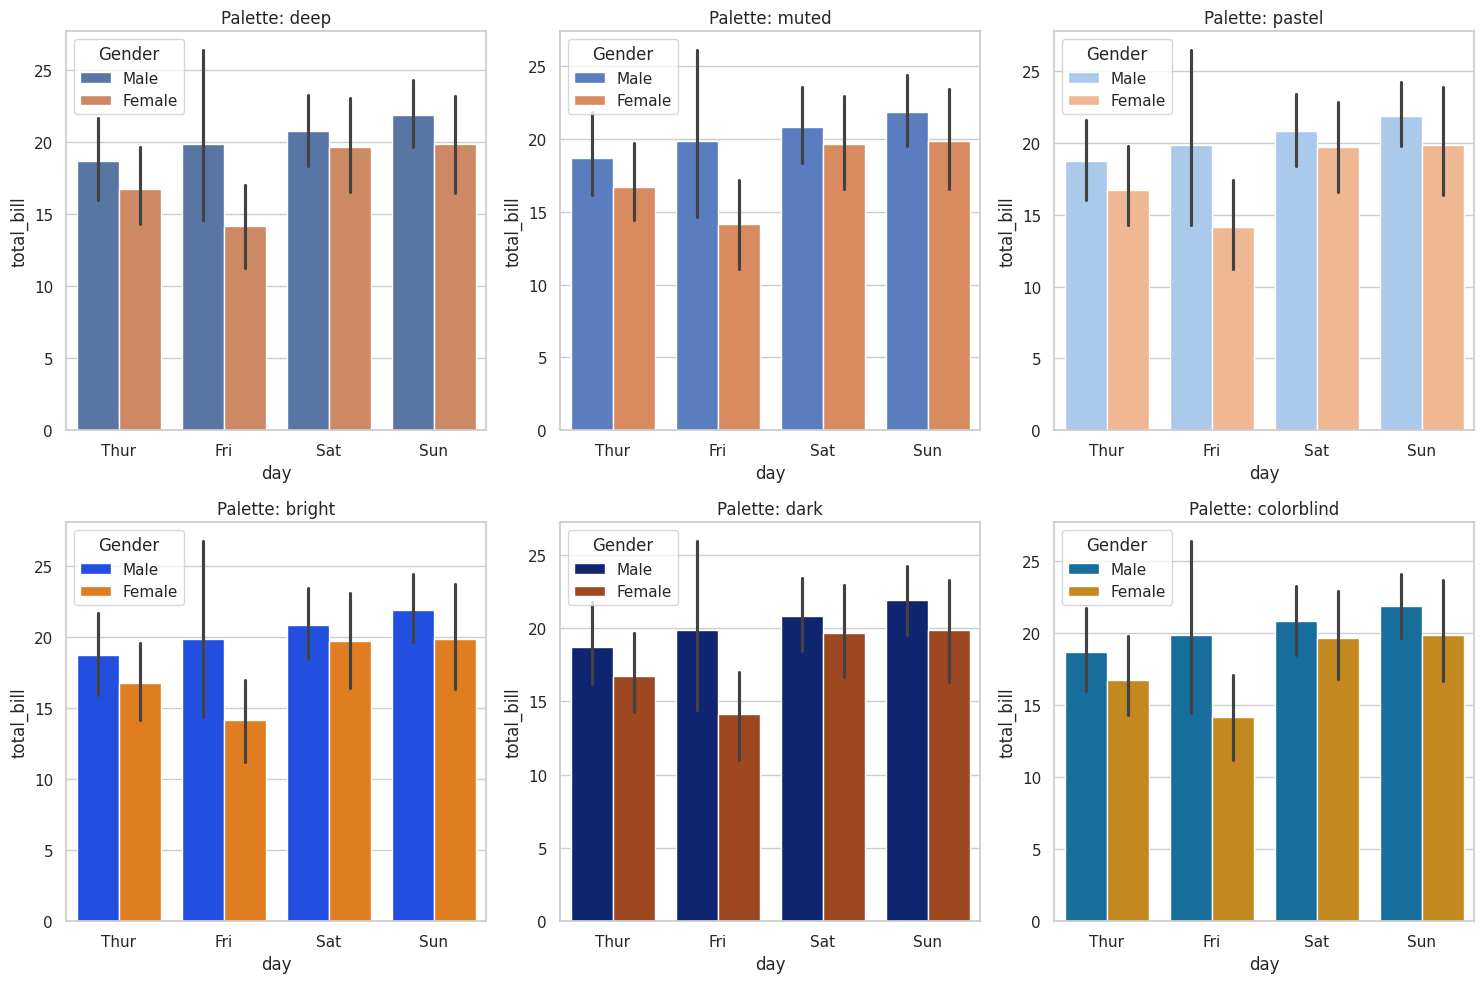

In [ ]:
# Demonstrate different themes
themes = ["darkgrid", "whitegrid", "dark", "white", "ticks"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, theme in enumerate(themes):
    if i < len(axes):
        with sns.axes_style(theme):
            sns.barplot(x="day", y="total_bill", data=tips, ax=axes[i])
            axes[i].set_title(f"Theme: {theme}")

# Remove the last subplot if it's empty
if len(themes) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Demonstrate color palettes
palettes = ["deep", "muted", "pastel", "bright", "dark", "colorblind"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, palette in enumerate(palettes):
    sns.barplot(x="day", y="total_bill", hue="sex", data=tips, palette=palette, ax=axes[i])
    axes[i].set_title(f"Palette: {palette}")
    axes[i].legend(title="Gender")

plt.tight_layout()
plt.show()

# Example: Advanced Data Analysis with Seaborn
Let's put everything together for a comprehensive data analysis:

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


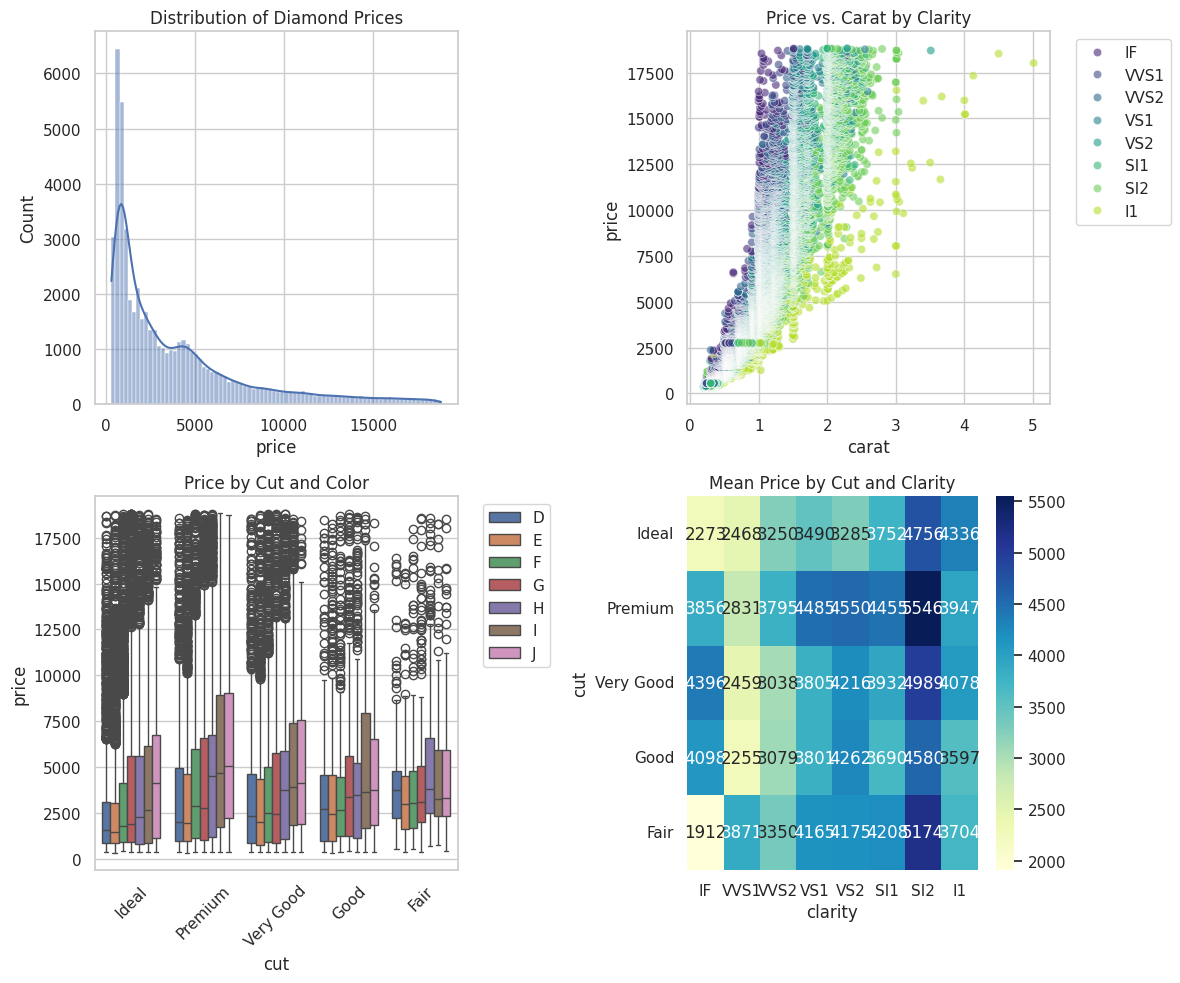

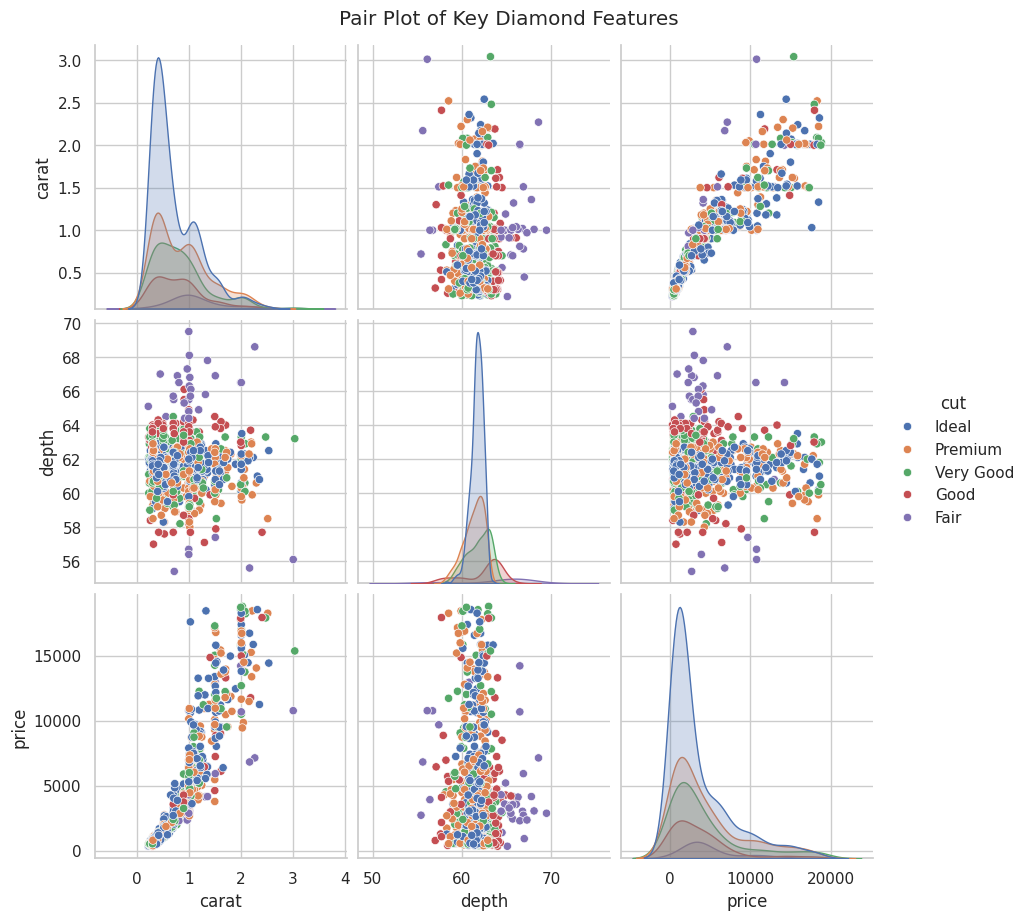

In [ ]:
# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")
print(diamonds.head())

# Create a comprehensive analysis using Seaborn
plt.figure(figsize=(12, 10))

# Create a price distribution plot
plt.subplot(2, 2, 1)
sns.histplot(data=diamonds, x="price", kde=True)
plt.title("Distribution of Diamond Prices")

# Explore the relationship between carat and price with clarity
plt.subplot(2, 2, 2)
sns.scatterplot(data=diamonds, x="carat", y="price", hue="clarity", palette="viridis", alpha=0.6)
plt.title("Price vs. Carat by Clarity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Compare price by cut and color
plt.subplot(2, 2, 3)
sns.boxplot(data=diamonds, x="cut", y="price", hue="color")
plt.title("Price by Cut and Color")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Visualize mean prices by cut and clarity
plt.subplot(2, 2, 4)
cut_clarity_price = diamonds.groupby(['cut', 'clarity'], observed=False)['price'].mean().reset_index()
cut_clarity_pivot = cut_clarity_price.pivot(index='cut', columns='clarity', values='price')
sns.heatmap(cut_clarity_pivot, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Mean Price by Cut and Clarity")

plt.tight_layout()
plt.show()

# Create a pair plot for multiple variable relationships
sns.pairplot(diamonds.sample(1000), hue="cut", vars=["carat", "depth", "price"],
             diag_kind="kde", height=3)
plt.suptitle("Pair Plot of Key Diamond Features", y=1.02)
plt.show()